# Discovering Video Game Success: Data-Driven Insights for Strategic Forecasting and Marketing

Welcome to the Ice online store project, where we embark on a journey to uncover the factors that drive video game success. Our dataset includes user and expert reviews, genres, platforms (such as Xbox and PlayStation), historical sales data, and ESRB ratings, which evaluate game content and assign age ratings like Teen or Mature.

By the end of this EDA, we aim to gain a deep understanding of the video game market, which will inform our strategies for forecasting and planning advertising campaigns for 2017. This analysis will also provide valuable experience in working with data to make informed business decisions.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df_start = pd.read_csv('/Users/keithrobinson/Desktop/TripleTen/Projects/project5/games.csv')

In [3]:
df_start.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df_start.rename(columns={    
    'Rating': 'rating',
    'User_Score': 'user_score',
    'Critic_Score': 'critic_score',
    'Other_sales': 'other_sales',
    'JP_sales': 'jp_sales',
    'EU_sales': 'eu_sales',
    'NA_sales': 'na_sales',
    'Genre': 'genre',
    'Year_of_Release': 'year_of_release',
    'Platform': 'platform',
    'Name': 'name',
},inplace=True)

In [5]:
df_start

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [6]:
df_start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
df_start.duplicated().sum() # Checked for any duplicate rows

0

In [8]:
duplicates = df_start[df_start.duplicated(subset=['name', 'year_of_release', 'platform'], keep=False)]

duplicates

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


In [9]:
df = df_start.drop_duplicates(subset=['name', 'year_of_release', 'platform'], keep='first')

df.reset_index(drop=True, inplace=True)

df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


There are 16,715 rows of entries. I conducted a "isnull().sum()" function to identify all of the null values in my dataframe.

In [10]:
df.isnull().sum()

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64

In [11]:
print(df['critic_score'].mean()) # Mean critic_score
print(df['critic_score'].median()) # Median critic_score

68.96595378564405
71.0


In [12]:
score_by_genre = df.groupby('genre')['critic_score'].mean().reset_index().sort_values(by='genre', ascending=False) #grouped genre by critic_score to see the mean of each genre. They're fairly close so I decided to take the mean of the critic_score series and use that to fill in the NaN values for critic_score.
score_by_genre 

,genre,critic_score
11,Strategy,72.086093
10,Sports,71.958927
9,Simulation,68.619318
8,Shooter,70.181144
7,Role-Playing,72.652646
6,Racing,67.963612
5,Puzzle,67.424107
4,Platform,68.058350
3,Misc,66.619503
2,Fighting,69.217604


Initially I tried to take the mean of user_score but received an error. I found out that there were 'tbd' values (objects) contained in the column.

In [13]:
df['user_score'] = df['user_score'].replace('tbd', np.nan) # I converted all the 'tbd' values to np.nan values so that I could get the median and mean.

/var/folders/2c/tfkhfg6d5jj1g3ttv18s3t5r0000gn/T/ipykernel_82771/2648302180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user_score'] = df['user_score'].replace('tbd', np.nan) # I converted all the 'tbd' values to np.nan values so that I could get the median and mean.


In [14]:
df['user_score'] = df['user_score'].astype(float) # Once I replaced the 'tbd' values, I converted the column to a float

/var/folders/2c/tfkhfg6d5jj1g3ttv18s3t5r0000gn/T/ipykernel_82771/862731515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user_score'] = df['user_score'].astype(float) # Once I replaced the 'tbd' values, I converted the column to a float


In [15]:
print(df['user_score'].mean())
print(df['user_score'].median()) # Again, these were very similar so I decided to go with the mean.


7.125260245091579
7.5


In [16]:
df.isnull().sum()

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         9124
rating             6765
dtype: int64

In [17]:
print(df['year_of_release'].median())
print(df['year_of_release'].mean())

2007.0
2006.4851009486742


In [18]:
yor_mean = df['year_of_release'].mean()

In [19]:
df = df.dropna(subset=['year_of_release']).copy()

In [20]:
df.isnull().sum()

name                  1
platform              0
year_of_release       0
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8462
user_score         8982
rating             6677
dtype: int64

In [21]:
df['year_of_release'] = df['year_of_release'].astype(int) # Changed year_of_release to an integer from a floating number

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [23]:
df.isnull().sum() # Checked again for null values

name                  1
platform              0
year_of_release       0
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8462
user_score         8982
rating             6677
dtype: int64

I want to explain what I did with the columns above. With the 'name' and 'genre' columns there were only 2 missing name values, since it was so minimal I ignored them. 

On the 'year_of_release' column I replaced the null values with the mean because I didn't want to just drop them and I figured filling them in with the mean would be better than not having them at all.

With 'critic_score' more than half of the rows in this column were null. I could not drop them or fill them with '0', so I filled them with the mean values of the column.

In the 'user_score' column there were over 6,000 rows with null values. Since it returning an object dtype, I discovered why. There were 'tbd' values in the column. I replaced those 'tbd' values with NaN values, then calculated the mean, then filled in the missing values with the mean.

In the 'rating' column, I left that column blank. I did not think dropping 6,000 rows would do my data any good and I couldn't fill it with any value.

In [24]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [25]:
df['name'].nunique()

11426

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [27]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1) # Created a column for 'total_sales'

In [28]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [29]:
games_per_year = df.groupby('year_of_release')['name'].count().sort_values(ascending=False).reset_index()
games_per_year.columns = ['year','count']

In [30]:
games_per_year

,year,count
0,2008,1427
1,2009,1426
2,2010,1255
3,2007,1197
4,2011,1136
5,2006,1006
6,2005,939
7,2002,829
8,2003,775
9,2004,762


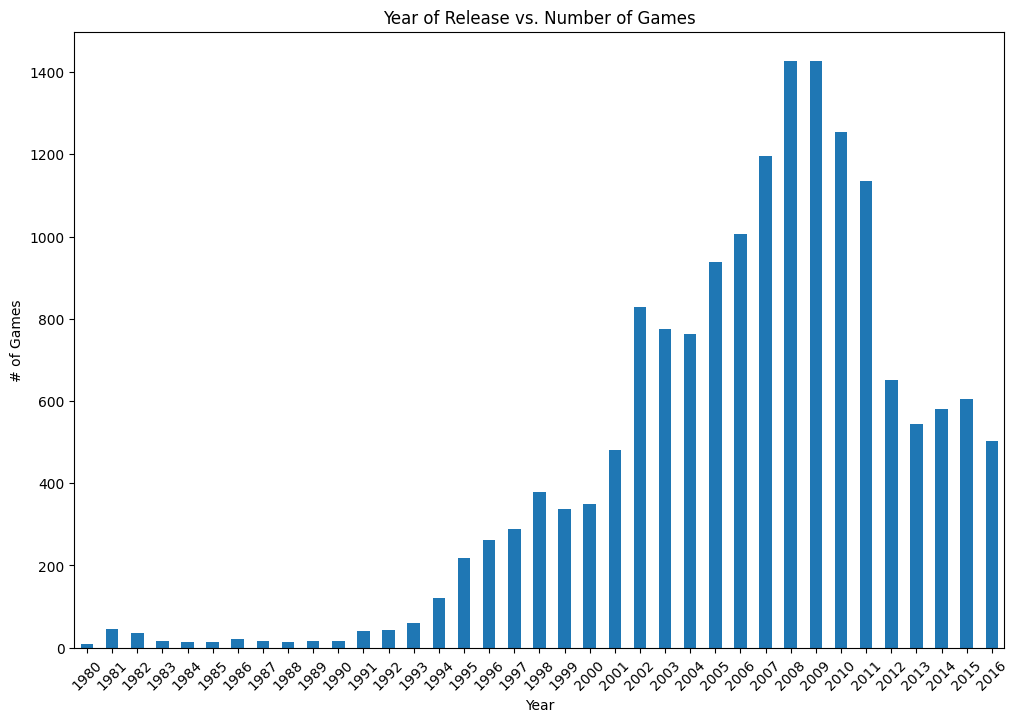

In [33]:
df['year_of_release'].value_counts().sort_index().plot(kind='bar', figsize=(12,8))

plt.title('Year of Release vs. Number of Games')
plt.xlabel('Year')
plt.ylabel('# of Games')

plt.xticks(rotation=45);

The number of games released tended to pick up come 2004-2012. Big drop off come 2012-2015.

In [34]:
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
platform_sales.columns = ['platform', 'sales']
platform_sales

,platform,sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.33
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


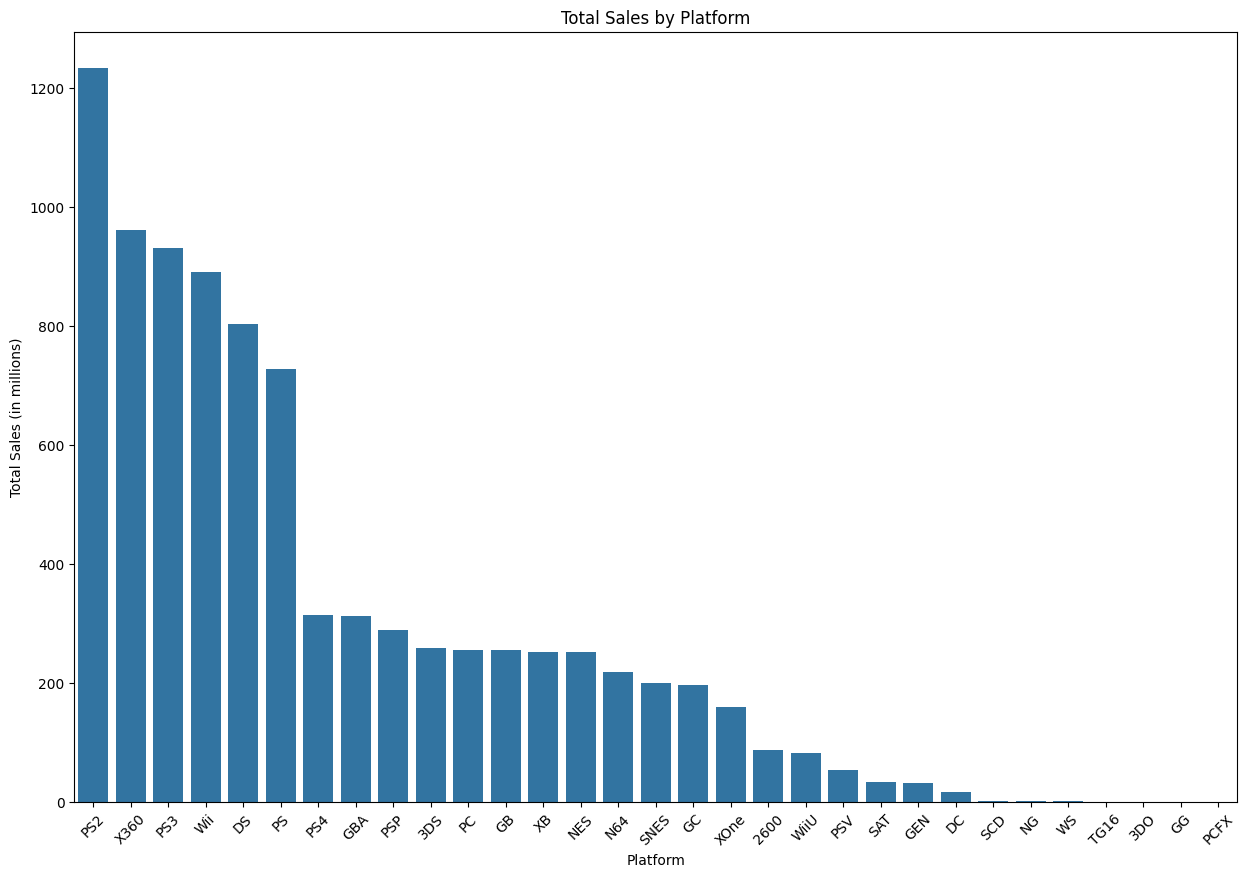

In [35]:
plt.figure(figsize=(15, 10))
sns.barplot(x='platform', y='sales', data=platform_sales)

plt.xlabel('Platform')
plt.ylabel("Total Sales (in millions)")
plt.title('Total Sales by Platform')
plt.xticks(rotation=45)

plt.show()


In [36]:
threshold_platform = platform_sales['sales'].quantile(0.75)

In [37]:
top_25percent_platform = platform_sales[platform_sales['sales'] > threshold_platform]

In [38]:
print('The top 25% of total sales by platform:')
print(top_25percent_platform)

The top 25% of total sales by platform:
  platform    sales
0      PS2  1233.56
1     X360   961.24
2      PS3   931.33
3      Wii   891.18
4       DS   802.78
5       PS   727.58
6      PS4   314.14
7      GBA   312.88


In [39]:
popular_platforms = top_25percent_platform['platform'].to_list()
popular_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA']

In [40]:
df_filtered = df[df['platform'].isin(popular_platforms)]
df_filtered

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16706,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01
16707,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01


In [41]:
platform_sales_by_year = df_filtered.groupby(['platform', 'year_of_release'])['total_sales'].sum().sort_index(ascending=False).reset_index()
platform_sales_by_year

,platform,year_of_release,total_sales
0,X360,2016,1.52
1,X360,2015,11.96
2,X360,2014,34.74
3,X360,2013,88.58
4,X360,2012,99.74
...,...,...,...
74,DS,2007,146.94
75,DS,2006,119.81
76,DS,2005,130.14
77,DS,2004,17.27


In [42]:
sales_pivot = pd.pivot_table(platform_sales_by_year, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
sales_pivot

platform,DS,GBA,PS,PS2,PS3,PS4,Wii,X360
year_of_release,,,,,,,,
1985,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,NaN,NaN,6.03,NaN,NaN,NaN,NaN,NaN
1995,NaN,NaN,35.96,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,94.70,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,136.17,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,169.49,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,144.53,NaN,NaN,NaN,NaN,NaN
2000,NaN,0.07,96.37,39.17,NaN,NaN,NaN,NaN
2001,NaN,61.53,35.59,166.43,NaN,NaN,NaN,NaN


According to the data above, [DS, GBA, PS, PS2] used to be popular but now have 0 sales in 2014-2016. And [Wii, X360] were very popular but now have low sales in 2016. Newer generation platforms like PS4 tend to have increasing sales.

<Axes: title={'center': 'Platform Sales by Year'}, xlabel='year_of_release'>

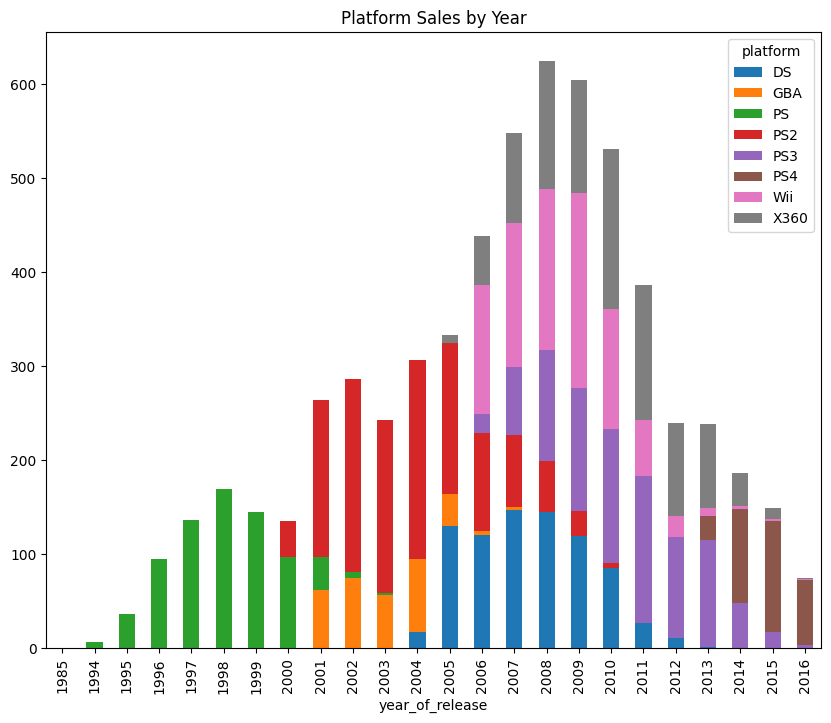

In [43]:
sales_pivot.plot(kind='bar', stacked=True, figsize=(10, 8), title='Platform Sales by Year')

In [44]:
temp_df = df.groupby(['platform', 'year_of_release']).count().reset_index()
duration_platforms = temp_df.groupby('platform')['year_of_release'].count().sort_values(ascending=False).reset_index()
duration_platforms.columns = ['platform', 'duration_platform']
duration_platforms

,platform,duration_platform
0,PC,26
1,GB,13
2,NES,12
3,X360,12
4,PSP,12
5,PS2,12
6,Wii,11
7,DS,11
8,PS3,11
9,2600,10


In [45]:
duration_platforms[['duration_platform']].mean()

duration_platform    7.677419
dtype: float64

According to the data, it generally takes about 7-8 years for a platform to fade and new ones to appear.


## Now I am going to look at data based on 2004-2017, that is when we have a good amount of data (according to histogram above).

In [46]:
relevant_data = df[(df['year_of_release'] >= 2012) & (df['year_of_release'] <= 2017)]

In [47]:
relevant_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16701,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16705,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [48]:
relevant_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     314.14
PS3     288.78
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: total_sales, dtype: float64

In [49]:
relevant_sales_by_year = relevant_data.groupby(['platform', 'year_of_release'])['total_sales'].sum().sort_index(ascending=False).reset_index()
relevant_sales_by_year

,platform,year_of_release,total_sales
0,XOne,2016,26.15
1,XOne,2015,60.14
2,XOne,2014,54.07
3,XOne,2013,18.96
4,X360,2016,1.52
5,X360,2015,11.96
6,X360,2014,34.74
7,X360,2013,88.58
8,X360,2012,99.74
9,WiiU,2016,4.60


In [50]:
relevant_pivot = pd.pivot_table(relevant_sales_by_year, index='year_of_release', columns='platform', aggfunc='sum')
relevant_pivot

total_sales                                                    \
platform                3DS     DS     PC     PS3     PS4   PSP    PSV    Wii   
year_of_release                                                                 
2012                  51.36  11.01  23.22  107.35     NaN  7.69  16.19  21.71   
2013                  56.57   1.54  12.38  113.25   25.99  3.14  10.59   8.59   
2014                  43.76    NaN  13.28   47.76  100.00  0.24  11.90   3.75   
2015                  27.78    NaN   8.52   16.82  118.90  0.12   6.25   1.14   
2016                  15.14    NaN   5.25    3.60   69.25   NaN   4.25   0.18   

                                      
platform          WiiU   X360   XOne  
year_of_release                       
2012             17.56  99.74    NaN  
2013             21.65  88.58  18.96  
2014             22.03  34.74  54.07  
2015             16.35  11.96  60.14  
2016              4.60   1.52  26.15

Out of the top 5: Xbox 360, PS3, Wii, DS, and PS2, none of these have sales that are increasing. They are all either non-existent for the past few years in sales OR shrinking. The platforms that are growing in sales are: PS4 and XOne.

New generation gaming systems seem to be what's growing in sales. Developers should be put to work on building new games for these systems until a newer generation platform appears. However, I see in the data that PC sales are fairly steady and have been since coming out. Safe to say that although it's a smaller population PC gamers aren't going anywhere.

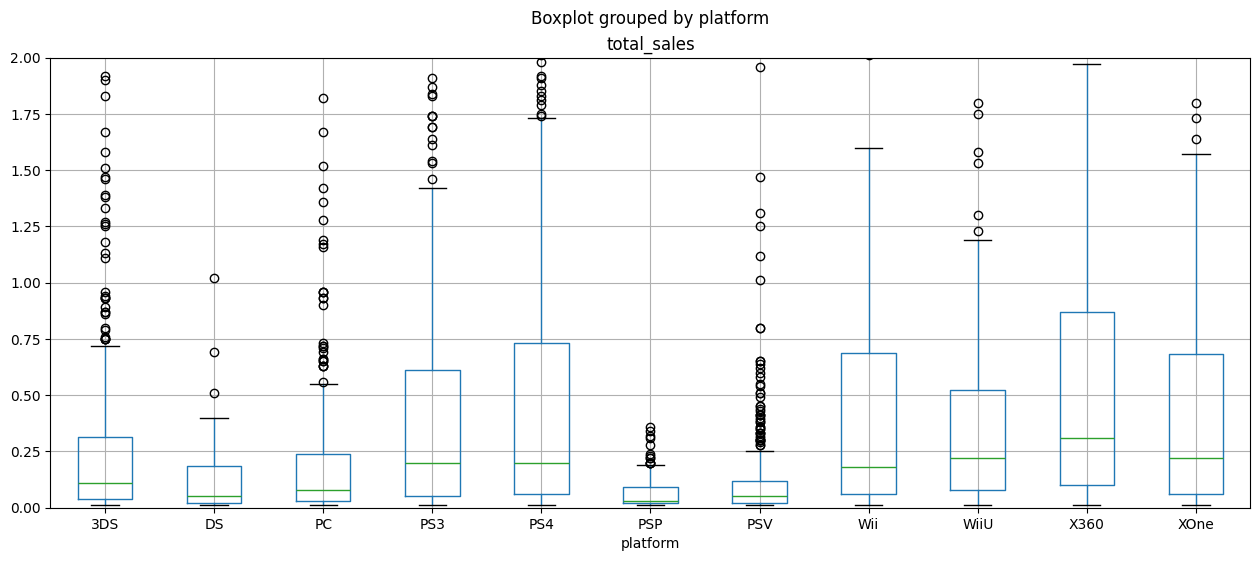

In [51]:
ax = relevant_data.boxplot(column='total_sales', by='platform', figsize=(15,6))
ax.set_ylim(0, 2)

plt.show()

In [52]:
avg_sales_by_platform = relevant_data.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
avg_sales_by_platform

platform
X360    0.810068
PS4     0.801378
Wii     0.655000
XOne    0.645020
PS3     0.586951
WiiU    0.559116
3DS     0.491439
DS      0.404839
PC      0.250600
PSV     0.119659
PSP     0.064682
Name: total_sales, dtype: float64

This is telling me that the median for game sales is just around 0.25 million across all platforms. Some fall under, some are over and some right at. There are also platforms with outliers but there tend to be way more outliers on the older platforms or not so popular platforms.


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3</h2>
    
Very good.     
    
</div>

<Axes: title={'center': 'Platform Sales by Year'}, xlabel='year_of_release'>

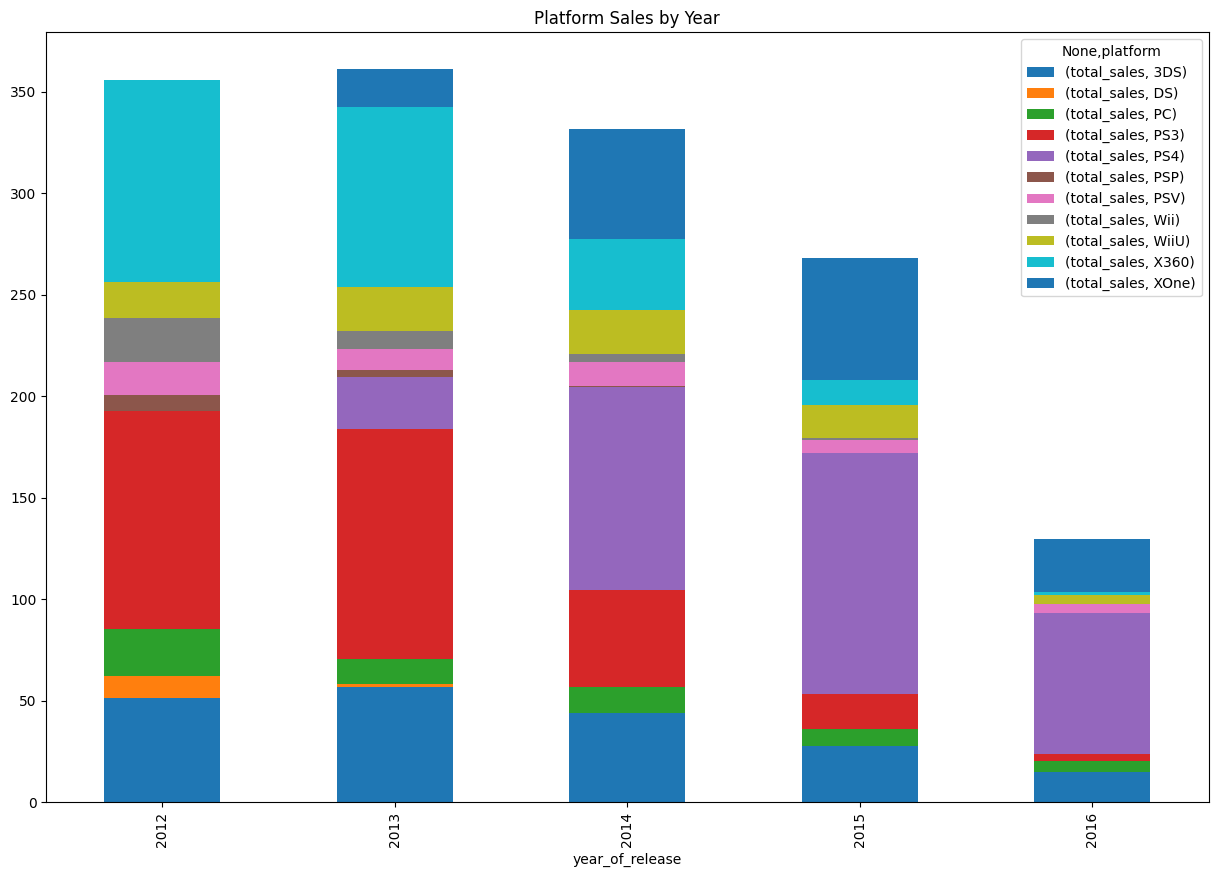

In [53]:
relevant_pivot.plot(kind='bar', stacked=True, figsize=(15,10), title='Platform Sales by Year', legend=True)

## I'm going to use the PS3 platform to describe the correlation between user and professional reviews and how they affect sales.

In [54]:
ps3_data = relevant_data[relevant_data['platform'] == 'PS3']
ps3_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
81,FIFA Soccer 13,PS3,2012,Action,1.06,5.01,0.13,1.97,88.0,6.6,E,8.17
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46
...,...,...,...,...,...,...,...,...,...,...,...,...
16626,Akatsuki no Goei Trinity,PS3,2012,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16636,Tour de France 2014,PS3,2014,Sports,0.00,0.01,0.00,0.00,NaN,NaN,E,0.01
16672,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16689,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [55]:
x360_data = relevant_data[relevant_data['platform'] == 'X360']
x360_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
66,Halo 4,X360,2012,Shooter,6.65,2.28,0.04,0.74,87.0,7.0,M,9.71
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,NaN,9.18
...,...,...,...,...,...,...,...,...,...,...,...,...
16448,Turbo: Super Stunt Squad,X360,2013,Sports,0.00,0.01,0.00,0.00,NaN,4.5,E,0.01
16458,Young Justice: Legacy,X360,2013,Action,0.00,0.01,0.00,0.00,NaN,6.2,T,0.01
16489,Ride,X360,2015,Racing,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16611,Dragon Ball Z for Kinect,X360,2012,Fighting,0.01,0.00,0.00,0.00,49.0,2.1,T,0.01


In [56]:
wii_data = relevant_data[relevant_data['platform'] == 'WiiU']
wii_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
110,Mario Kart 8,WiiU,2014,Racing,3.15,2.15,1.28,0.51,88.0,9.1,E,7.09
185,New Super Mario Bros. U,WiiU,2012,Platform,2.30,1.34,1.27,0.32,84.0,8.1,E,5.23
216,Super Smash Bros. for Wii U and 3DS,WiiU,2014,Fighting,2.60,1.08,0.81,0.38,NaN,NaN,NaN,4.87
247,Splatoon,WiiU,2015,Shooter,1.54,1.18,1.46,0.26,81.0,8.5,E10+,4.44
248,Nintendo Land,WiiU,2012,Misc,2.52,1.11,0.46,0.33,77.0,7.9,E10+,4.42
...,...,...,...,...,...,...,...,...,...,...,...,...
16374,Dragon Quest X: All in One Package,WiiU,2015,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16410,Legend of Kay Anniversary,WiiU,2015,Action,0.00,0.01,0.00,0.00,67.0,7.1,E10+,0.01
16418,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015,Puzzle,0.00,0.00,0.01,0.00,70.0,7.4,E,0.01
16508,Art Academy: Home Studio,WiiU,2015,Misc,0.00,0.00,0.01,0.00,82.0,8.3,E,0.01


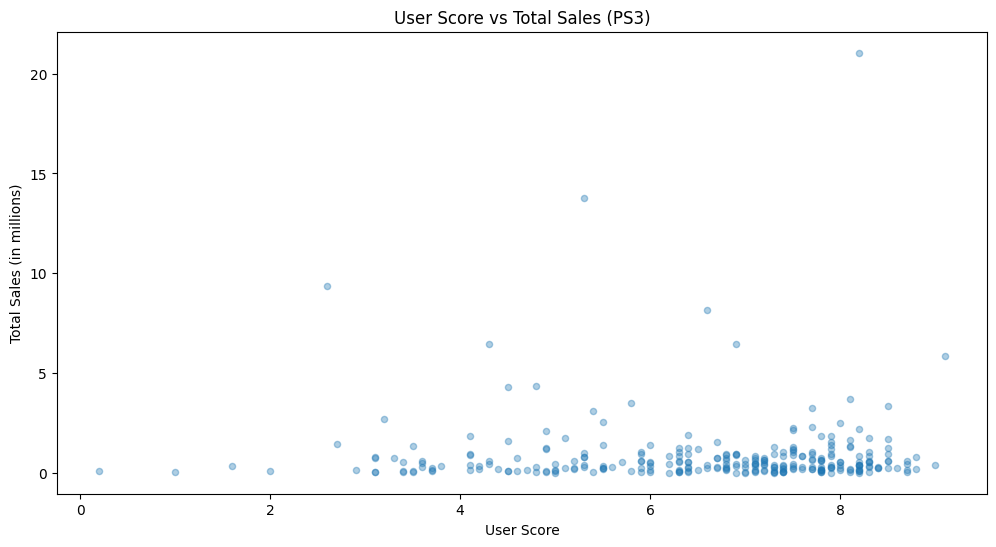

In [57]:
ps3_data.plot(
    x='user_score',
    y='total_sales',
    kind='scatter',
    alpha=0.36,
    title='User Score vs Total Sales (PS3)',
    figsize=[12, 6],
    xlabel='User Score',
    ylabel='Total Sales (in millions)'
)

plt.show()

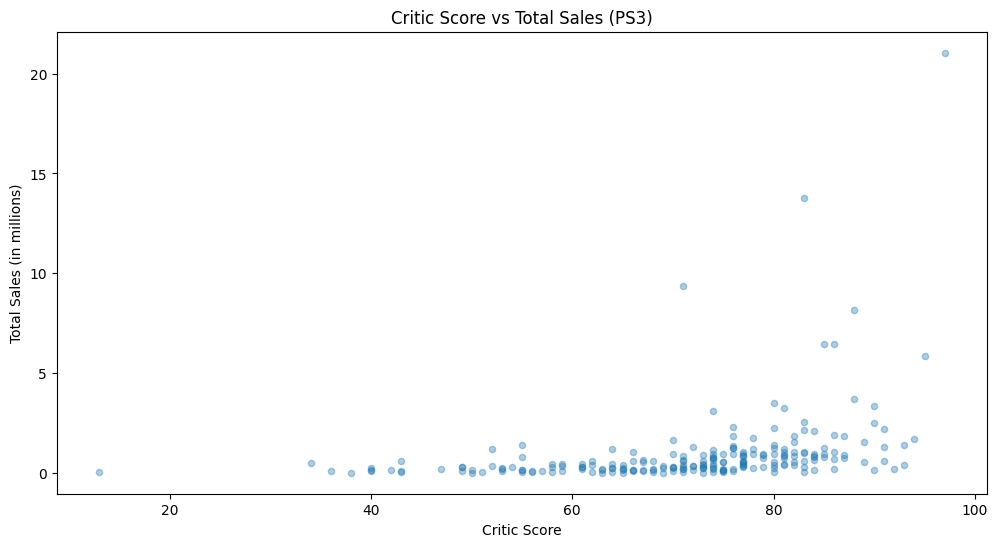

In [58]:
ps3_data.plot(
    x='critic_score',
    y='total_sales',
    kind='scatter',
    alpha=0.36,
    title='Critic Score vs Total Sales (PS3)',
    figsize=[12, 6],
    xlabel='Critic Score',
    ylabel='Total Sales (in millions)'
)

plt.show()

To me it looks like if PS3 scores stay in the 75th percentile or above you can typically see more sales.

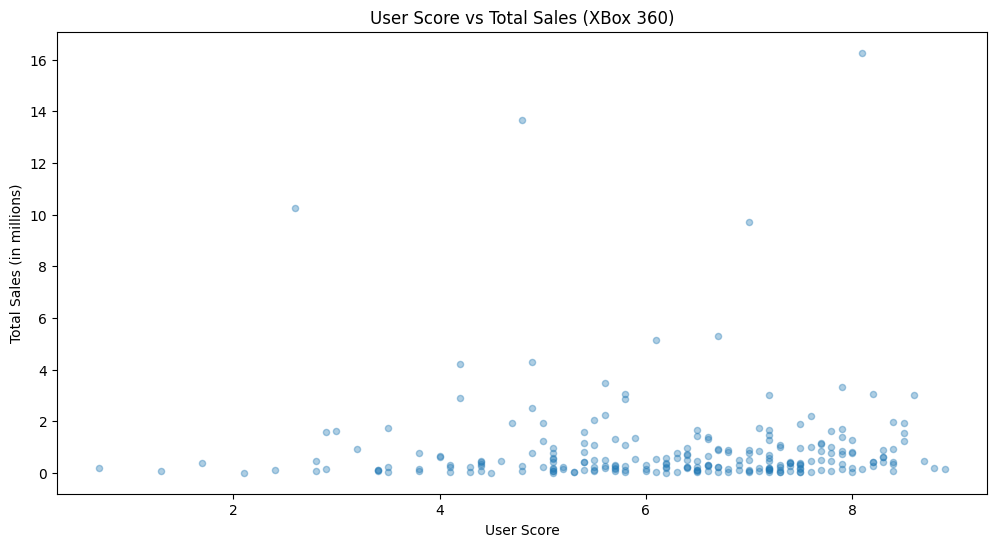

In [59]:
x360_data.plot(
    x='user_score',
    y='total_sales',
    kind='scatter',
    alpha=0.36,
    title='User Score vs Total Sales (XBox 360)',
    figsize=[12, 6],
    xlabel='User Score',
    ylabel='Total Sales (in millions)'
)

plt.show()

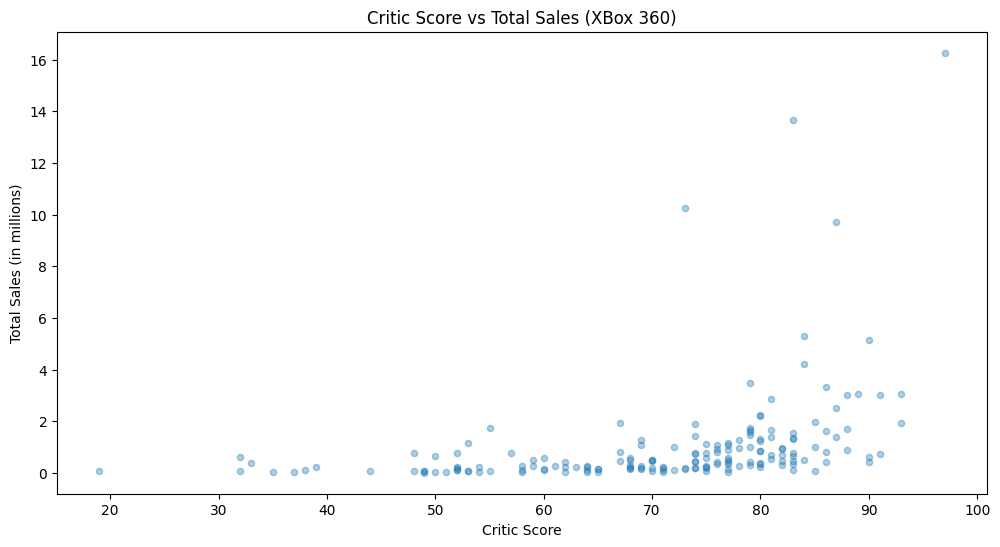

In [60]:
x360_data.plot(
    x='critic_score',
    y='total_sales',
    kind='scatter',
    alpha=0.36,
    title='Critic Score vs Total Sales (XBox 360)',
    figsize=[12, 6],
    xlabel='Critic Score',
    ylabel='Total Sales (in millions)'
)

plt.show()

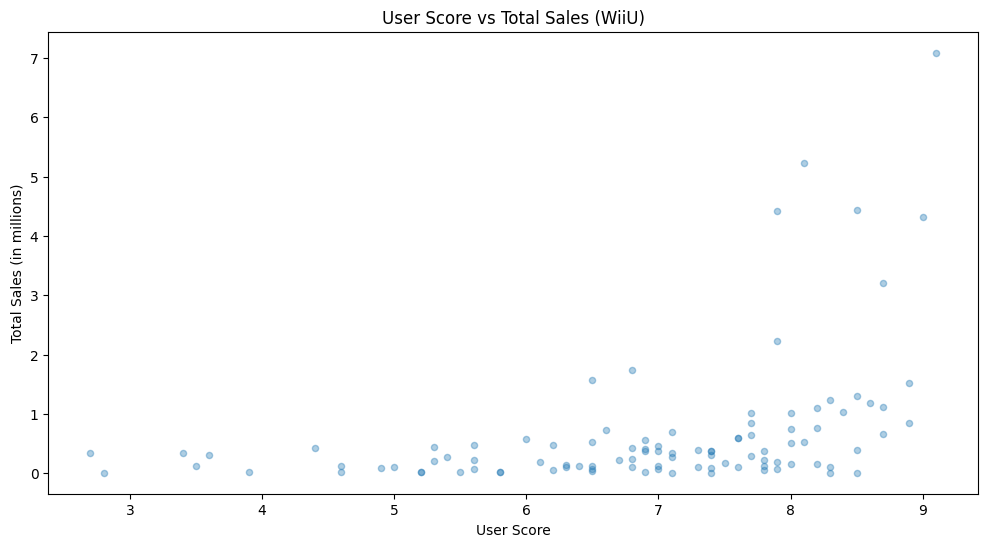

In [61]:
wii_data.plot(
    x='user_score',
    y='total_sales',
    kind='scatter',
    alpha=0.36,
    title='User Score vs Total Sales (WiiU)',
    figsize=[12, 6],
    xlabel='User Score',
    ylabel='Total Sales (in millions)'
)

plt.show()

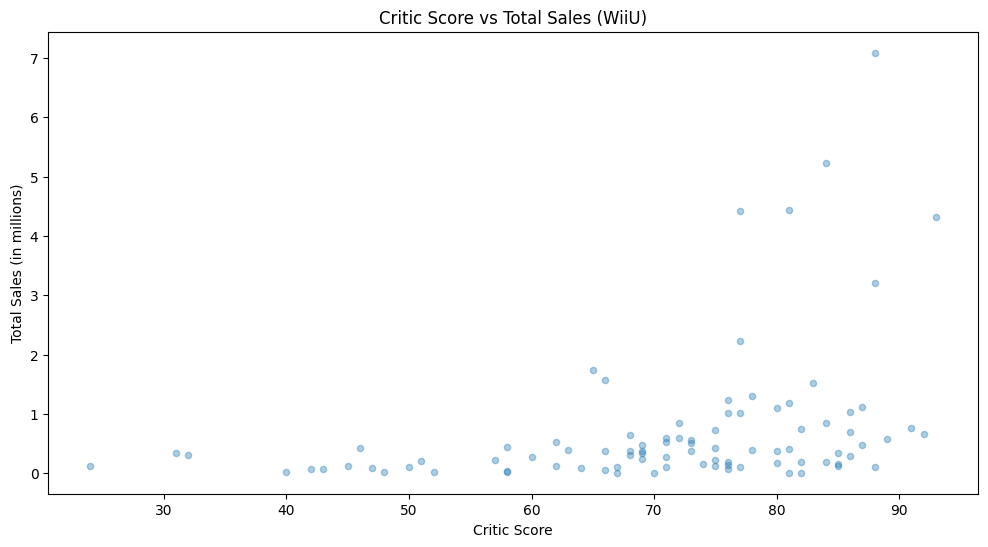

In [62]:
wii_data.plot(
    x='critic_score',
    y='total_sales',
    kind='scatter',
    alpha=0.36,
    title='Critic Score vs Total Sales (WiiU)',
    figsize=[12, 6],
    xlabel='Critic Score',
    ylabel='Total Sales (in millions)'
)

plt.show()

Looking at the data for other platforms, it seems the ratings play a similar factor on sales. If ratings are in that upper 75th percentile, those games tend to make more in sales.

In [63]:
ps3_data['total_sales'].corr(ps3_data['critic_score'])

0.33415175755098564

In [64]:
ps3_data['total_sales'].corr(ps3_data['user_score'])

-0.006205767686051493

In [65]:
x360_data['total_sales'].corr(x360_data['critic_score'])

0.36057348885073387

In [66]:
x360_data['total_sales'].corr(x360_data['user_score'])

0.006163978646213357

In [67]:
wii_data['total_sales'].corr(wii_data['critic_score'])

0.3483797601201749

In [68]:
wii_data['total_sales'].corr(wii_data['user_score'])

0.4002190202148617

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Comment </h2>
   

I've chosen to compare the Xbox 360 and WiiU with the PS3 since these systems were released around the same time. The data suggests that critic scores significantly impact total game sales across these platforms, with higher sales generally linked to scores of 75 and above.

User scores, however, play a lesser role. For the Wii, user scores appear more influential, but on the Xbox 360 and PS3, even games with user scores below 6 have notable sales. Nonetheless, higher sales are typically seen with user scores of 7 and above.
    
</div>

In [69]:
genre_dist = relevant_data['genre'].value_counts()
genre_dist

genre
Action          1031
Role-Playing     370
Adventure        302
Sports           267
Shooter          235
Misc             192
Racing           115
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
Name: count, dtype: int64

In [70]:
genre_dist_mean = relevant_data.groupby('genre')['total_sales'].mean().sort_values(ascending=False).reset_index()
genre_dist_mean.columns = ['genre', 'average_sales']
genre_dist_mean

,genre,average_sales
0,Shooter,1.296723
1,Platform,0.717647
2,Sports,0.678127
3,Role-Playing,0.521081
4,Racing,0.465217
5,Misc,0.442917
6,Simulation,0.439000
7,Action,0.427856
8,Fighting,0.408165
9,Strategy,0.187887


In [71]:
genre_dist_med = relevant_data.groupby('genre')['total_sales'].median().sort_values(ascending=False).reset_index()
genre_dist_med.columns = ['genre', 'median_sales']
genre_dist_med

,genre,median_sales
0,Shooter,0.440
1,Sports,0.240
2,Platform,0.210
3,Role-Playing,0.140
4,Racing,0.140
5,Fighting,0.130
6,Action,0.120
7,Misc,0.120
8,Simulation,0.120
9,Strategy,0.080


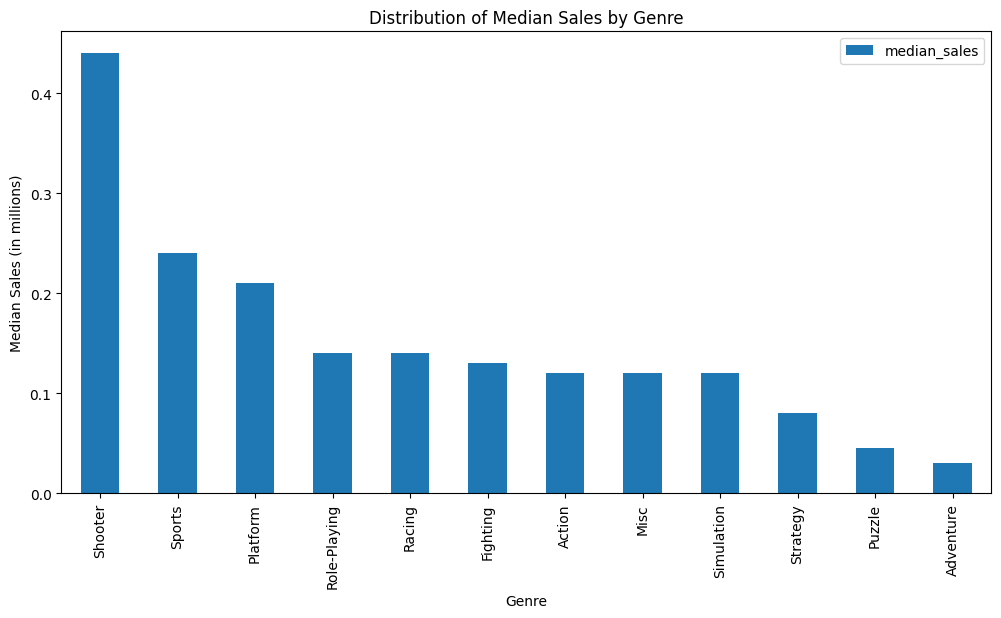

In [72]:
genre_dist_med.plot(
    x='genre',
    y='median_sales',
    kind='bar',
    title='Distribution of Median Sales by Genre',
    figsize=[12, 6],
    xlabel='Genre',
    ylabel='Median Sales (in millions)'
)

plt.show()

The Action and Sports genres have the higher number of games made throughout the entire network of platforms. With Action being more than double the 4th highest (Role-Playing). If you want a good chance of creating sales, your best bet is to create an Action game. Steer clear of puzzle games, those tend to do the worst in sales.

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Comment </h2>
   

I decided to use the median sales due to the many outliers that would've skewed the data. Looking at the median the top 3 are as follows: Shooter, Platform, Sports. So Action games aren't in the top spot, all of the platforms just release a ton of Action games.
    
</div>

In [73]:
regions = ['na_sales', 'eu_sales', 'jp_sales']

top_platforms_by_region = {}

for region in regions:
    region_sales = relevant_data.groupby('platform')[region].sum()
    
    top_platforms = region_sales.sort_values(ascending=False).head(5)
    
    top_platforms_by_region[region] = top_platforms

for region, platforms in top_platforms_by_region.items():
    print(f"Top 5 platforms for {region}:")
    print(platforms)
    print()

Top 5 platforms for na_sales:
platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      55.31
Name: na_sales, dtype: float64

Top 5 platforms for eu_sales:
platform
PS4     141.09
PS3     106.85
X360     74.52
XOne     51.59
3DS      42.64
Name: eu_sales, dtype: float64

Top 5 platforms for jp_sales:
platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64



<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Comment </h2>
   

North America has high sales for Xbox 360, Wii and PS3. Europe has high sales for PS3, Xbox 360 and Wii. And Japan has high sales for DS, 3DS and PS3. 
    
North American has more than 3x sales than Japan. And North American and Europe have the same platforms in the top 3 but just in a different order. North America has its highest sales with Xbox 360 and Europe has its highest in PS3. 
    
</div>

North America is HEAVY on gaming, compared to EU and JP. Their sales with Xbox360 almost double the top selling platform in EU (PS2) and triple that of JP's top seller (DS). So North Americans game. 

North Americans are also the only country with Xbox360 in their top 5, so it's safe to say North Americans lean more towards the Microsoft brand, whereas Europeans lean more towards Playstation. EU has both PS2 and PS3 in their #1 and #2 spot.

Japanese seem to be a bit more nostalgic. I see their sales mostly being older or classic gaming systems. 

In [74]:
regions = ['na_sales', 'eu_sales', 'jp_sales']

top_genres_by_region = {}

for region in regions:
    region_sales = relevant_data.groupby('genre')[region].sum()
    
    top_genres = region_sales.sort_values(ascending=False).head(5)
    
    top_genres_by_region[region] = top_genres

for region, genres in top_genres_by_region.items():
    print(f"Top 5 genres for {region}:")
    print(genres)
    print()

Top 5 genres for na_sales:
genre
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Name: na_sales, dtype: float64

Top 5 genres for eu_sales:
genre
Action          159.34
Shooter         113.47
Sports           69.08
Role-Playing     48.53
Racing           27.29
Name: eu_sales, dtype: float64

Top 5 genres for jp_sales:
genre
Role-Playing    65.44
Action          52.80
Misc            12.86
Simulation      10.41
Fighting         9.44
Name: jp_sales, dtype: float64



Action genres have high sales across all 3 regions with Action being #1 in NA and EU and #2 in JP. Followed by Sports which is #2 in both NA and EU and #3 in JP. Role playing is #1 in JP for sales, which explains why Role Playing is #4 in sales overall when all 3 regions are combined.

In [75]:
regions = ['na_sales', 'eu_sales', 'jp_sales']

esrb_sales_by_region = {}

for region in regions:
    region_sales = relevant_data.groupby('rating')[region].sum().sort_values(ascending=False)
    
    esrb_sales_by_region[region] = region_sales

for region, sales in esrb_sales_by_region.items():
    print(f"Sales by ESRB rating for {region}:")
    print(sales)
    print()

Sales by ESRB rating for na_sales:
rating
M       231.57
E       114.37
E10+     75.70
T        66.02
Name: na_sales, dtype: float64

Sales by ESRB rating for eu_sales:
rating
M       193.96
E       113.02
E10+     55.37
T        52.96
Name: eu_sales, dtype: float64

Sales by ESRB rating for jp_sales:
rating
E       28.33
T       26.02
M       21.20
E10+     8.19
Name: jp_sales, dtype: float64



Games that are for everyone tend to have the highest amount of sales in NA and EU. Followed closely by Mature and Teen at #2 and #3. So to be on the safe side, make and Action game that is rated for Everyone to increase your chance of higher sales across the globe.

## Hypothesis Testing

In [76]:
from scipy import stats

In [77]:
xbox_one_ratings = relevant_data[relevant_data['platform'] == 'XOne']['user_score'].dropna()
pc_ratings = relevant_data[relevant_data['platform'] == 'PC']['user_score'].dropna()

In [78]:
xbox_one_ratingss = relevant_data[relevant_data['platform'] == 'XOne']
xbox_one_ratingss

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
...,...,...,...,...,...,...,...,...,...,...,...,...
16628,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01
16641,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,NaN,6.6,E,0.01
16643,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16658,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,NaN,0.01


In [79]:
xbox_one_ratings

165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16542    6.8
16595    6.0
16628    8.2
16641    6.6
16658    6.7
Name: user_score, Length: 182, dtype: float64

In [80]:
t_stat, p_value = stats.ttest_ind(xbox_one_ratings, pc_ratings, equal_var=False)

In [81]:
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 0.5998585993590415
P-value: 0.5489537965134912


In [82]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Evidence found to conclude that the average user ratings for the platforms are significantly different.")
else:
    print("Fail to reject the null hypothesis: Data doesn't support the idea that the ratings are different. Ratings could be similar")

Fail to reject the null hypothesis: Data doesn't support the idea that the ratings are different. Ratings could be similar


In [83]:
action_ratings = relevant_data[relevant_data['genre'] == 'Action']['user_score'].dropna()
sports_ratings = relevant_data[relevant_data['genre'] == 'Sports']['user_score'].dropna()

In [84]:
t_stat, p_value = stats.ttest_ind(action_ratings, sports_ratings, equal_var=False)

In [85]:
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 9.863487132322389
P-value: 5.989458066467418e-20


In [86]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Evidence found to conclude that the average user ratings for the genres are significantly different.")
else:
    print("Fail to reject the null hypothesis: Data doesn't support the idea that the ratings are differents. Ratings could be similar.")

Reject the null hypothesis: Evidence found to conclude that the average user ratings for the genres are significantly different.


## Formulating the Hypotheses:
<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Comment </h2>
   

Null Hypothesis (H0): 
For Xbox One and PC platforms: The average user ratings are the same.


Alternative Hypothesis (H1): 
For Xbox One and PC platforms: The average user ratings are different.


This hypothesis is structured to statistically assess differences in average user ratings between Xbox One and PC, using a two-sample t-test to compare the means.
    
</div>


<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Comment </h2>
   

Null Hypothesis (H0): 
For Action and Sports genres: The average user ratings are the same.

Alternative Hypothesis (H1): 
For Action and Sports genres: The average user ratings are different.


This hypothesis is structured to statistically assess differences in average user ratings between Action and Sports genres, using a two-sample t-test to compare the means.
    
</div>


In this project, we explored sales patterns, platform and genre trends, and identified factors influencing game success. Key findings include:

Platform and Genre Analysis: Certain platforms and genres demonstrate potential, aligning with consumer preferences across regions.

Review Impact: User and critic reviews show varying influences on sales, crucial for marketing strategies.

Regional Profiles: Market variations highlight tailored approaches required for different regions.

Hypothesis Testing: Statistical analysis validated or refuted assumptions on user ratings, enhancing strategic insights.


<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Final Conclusion </h2>
   

In conclusion, there is one platform that shows a ton of promise: PS4. Since the release of the PS4, the sales for the platform has increased year by year. Xbox One has also increased BUT its sales are increasing a lot slower than PS4's. Playstation seems to be popular worldwide. North America tends to lean more towards Microsoft. 

If we're going to look at the main platforming companies: Nintendo, Playstation and Microsoft, then Nintendo seems to be popular in Japan. Microsoft a tad more favorable in North America and Playstation a tad more favorable in Europe.

If I'm looking at genres, I would put more effort into developing Shooters, Platform and Sports games as those tend to be produce the highest amount of sales across all platforms.


And looking at the ratings, games that are for everyone tend to have the highest amount of sales. Followed closely by Mature and Teen. So to be on the safe side, if I'm a developer I will look into making Shooter, Platform or Sports games that are rated for Everyone (then maybe Mature or Teen) to increase your chance of higher sales across the globe. 

If I'm Playstation, I have to feel good about the future! Playstation sells well across the globe! The future is bright for that particular platform!
    
</div>